In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
learning_rate = 0.01
num_epochs = 10

np.random.seed(0)
num_data = 300
x_data = np.random.uniform(low=-1, high=1, size=(num_data, 2))
y_data = np.zeros(shape=(num_data,))
for i in range(num_data):
    if x_data[i, 0] + x_data[i, 1] > 0:
        y_data[i] = 1
    else:
        y_data[i] = -1

num_train = 200
x_train = x_data[:num_train, :]
y_train = y_data[:num_train]
x_eval = x_data[num_train:, :]
y_eval = y_data[num_train:]

In [56]:
input_dim = 2
output_dim = 1
weights = np.random.randn(input_dim, output_dim)
bias = 0

def perceptron(x):
    linear_output = np.dot(x, weights) + bias
    y_pred = np.where(linear_output > 0, 1, -1)
    return y_pred


train_loss = []
eval_loss = []
for epoch in range(num_epochs):
    y_pred_train = perceptron(x_train)
    train_loss_value = np.mean(y_train != y_pred_train)
    train_loss.append(train_loss_value)

    y_pred_eval = perceptron(x_eval)
    eval_loss_value = np.mean(y_eval != y_pred_eval)
    eval_loss.append(eval_loss_value)

    # if epoch % 100 == 0:
    print("Epoch: %d, Train Loss: %.4f, Eval Loss: %.4f" % (epoch, train_loss_value, eval_loss_value))

    for i in range(num_train):
        y_pred_i = perceptron(x_train[i, :])
        if y_train[i] != y_pred_i:
            weights += learning_rate * y_train[i] * np.reshape(x_train[i, :], (2, 1))
            bias += learning_rate * y_train[i]

Epoch: 0, Train Loss: 0.5002, Eval Loss: 0.5040
Epoch: 1, Train Loss: 0.5002, Eval Loss: 0.5040
Epoch: 2, Train Loss: 0.4998, Eval Loss: 0.4976
Epoch: 3, Train Loss: 0.4999, Eval Loss: 0.4992
Epoch: 4, Train Loss: 0.4998, Eval Loss: 0.4976
Epoch: 5, Train Loss: 0.4999, Eval Loss: 0.4976
Epoch: 6, Train Loss: 0.4978, Eval Loss: 0.4952
Epoch: 7, Train Loss: 0.4998, Eval Loss: 0.4968
Epoch: 8, Train Loss: 0.4998, Eval Loss: 0.4968
Epoch: 9, Train Loss: 0.4998, Eval Loss: 0.4968


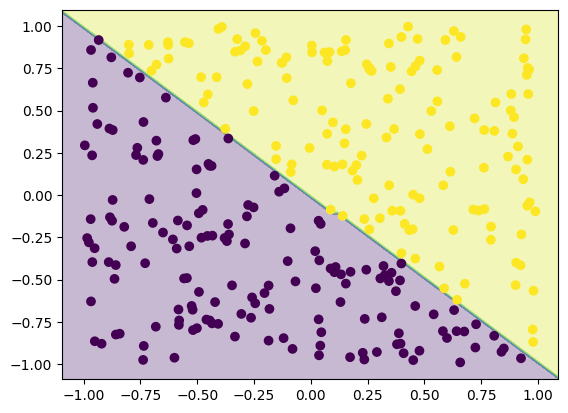

In [57]:
x_min, x_max = x_data[:, 0].min() - 0.1, x_data[:, 0].max() + 0.1
y_min, y_max = x_data[:, 1].min() - 0.1, x_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
y_pred = perceptron(X)
y_pred = np.reshape(y_pred, xx.shape)

plt.contourf(xx, yy, y_pred, alpha=0.3)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()